In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from head import Emulator, Grid

log norm distribution Mean value :  268362.2865208745  Variance:  5.184705528515068e+21


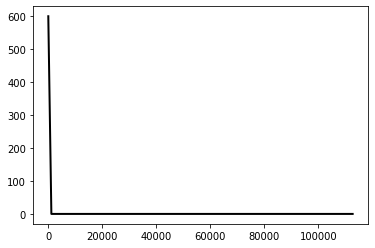

In [15]:
from scipy.stats import lognorm, norm
loc, s = 25,5
dist = lognorm(loc=loc, s=s)
mean, var = dist.stats()
print('log norm distribution Mean value : ', mean, ' Variance: ', var)
x = np.linspace(dist.ppf(0.01),dist.ppf(0.99), 100)
plt.plot(x, dist.pdf(x), 'k-', lw=2)
plt.show()

In [4]:
sim = Emulator(use_mean=False)

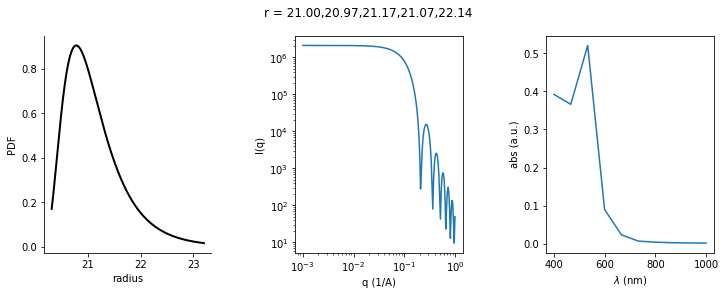

In [16]:
def run(mu, sigma):
    fig, axs = plt.subplots(1,3,figsize=(4*3,4))
    fig.subplots_adjust(wspace=0.5)
    sim.make_structure(r_mu=mu,r_sigma=sigma)
    sim.plot_radii(axs[0])
    axs[0].set_xlabel('radius')
    axs[0].set_ylabel('PDF')

    q, pq = sim.get_saxs()
    axs[1].plot(q, pq)
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    plt.setp(axs[1], xlabel='q (1/A)', ylabel='I(q)')

    wl, abs_ = sim.get_spectrum(n_samples=10)
    axs[2].plot(wl, abs_)
    plt.setp(axs[2], xlabel=r'$\lambda$ (nm)', ylabel='abs (a.u.)')

    fig.suptitle('r = '+','.join('%.2f'%i for i in sim.radii))
    plt.show()

run(20,0.5)

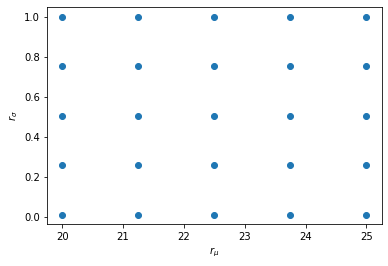

In [6]:
X = np.linspace(20,25, num=5) 
Y = np.linspace(0.01,1, num=5)
grid = Grid(X,Y)
fig, ax = plt.subplots()
ax.scatter(grid.points[:,0], grid.points[:,1])
ax.set_xlabel(r'$r_{\mu}$')
ax.set_ylabel(r'$r_{\sigma}$')
plt.show()

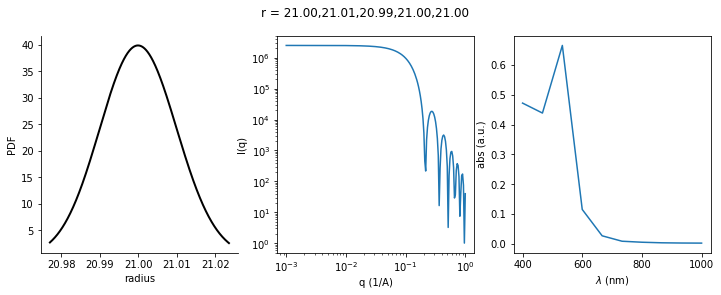

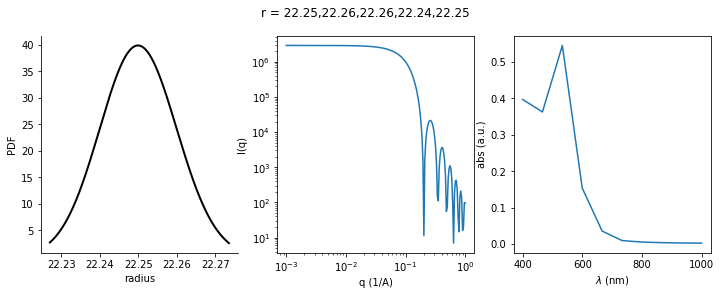

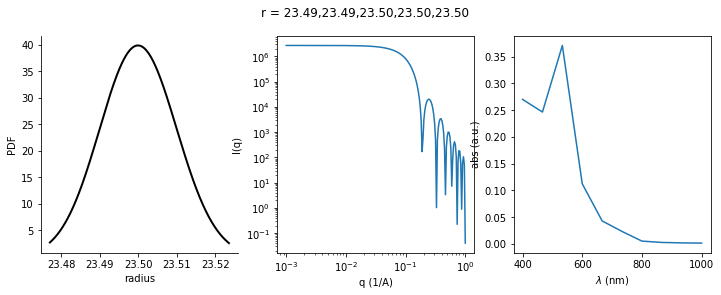

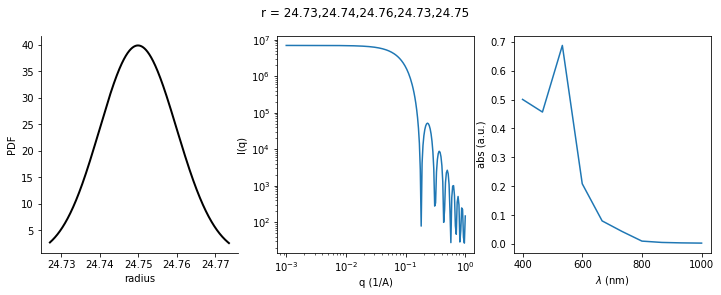

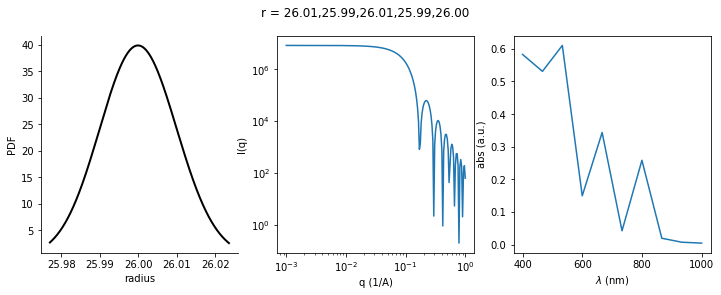

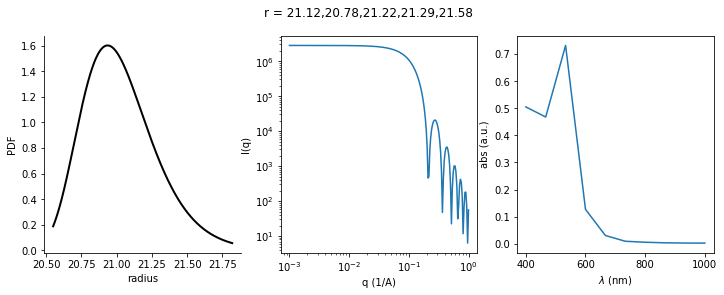

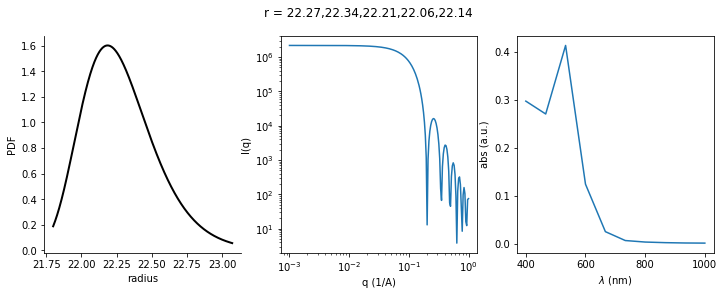

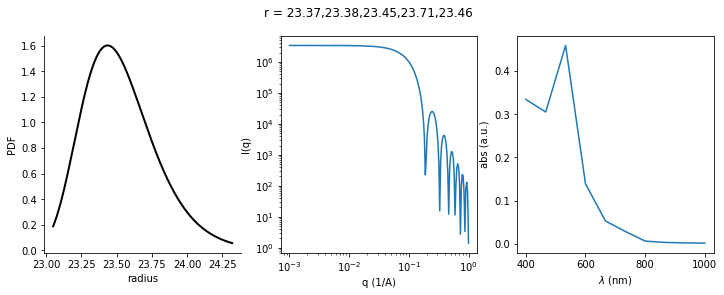

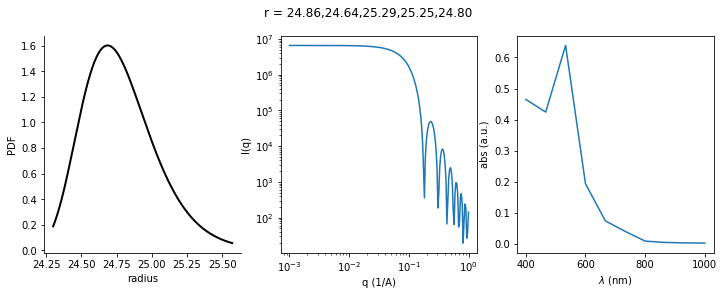

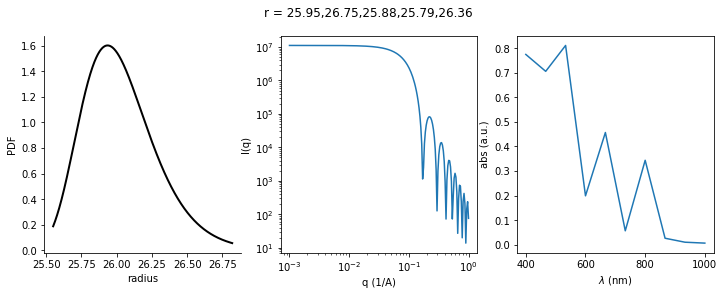

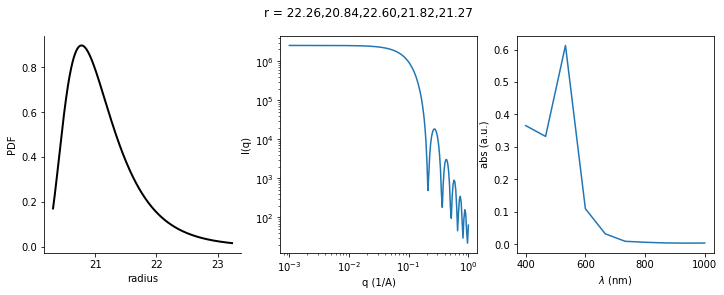

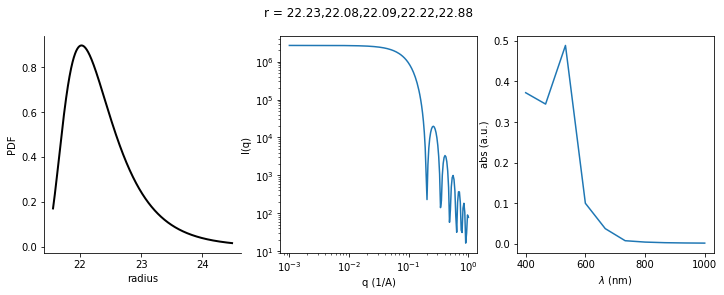

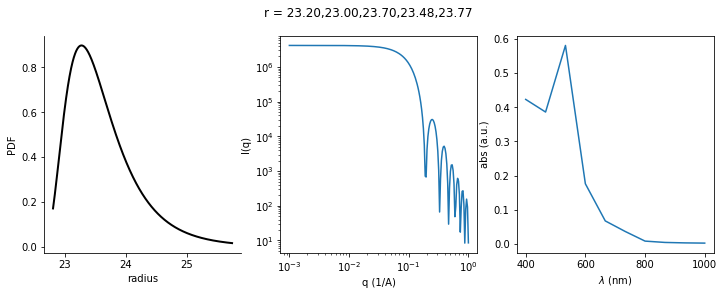

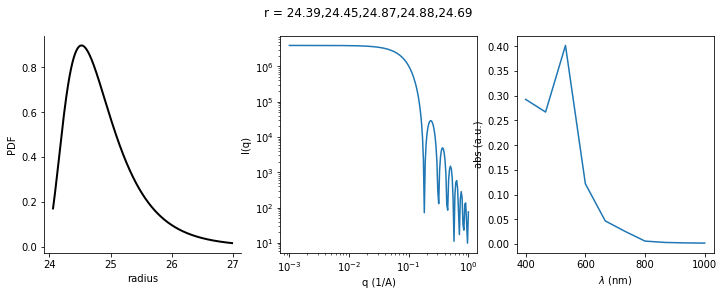

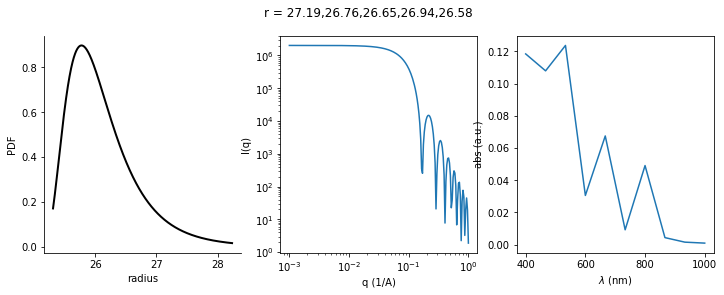

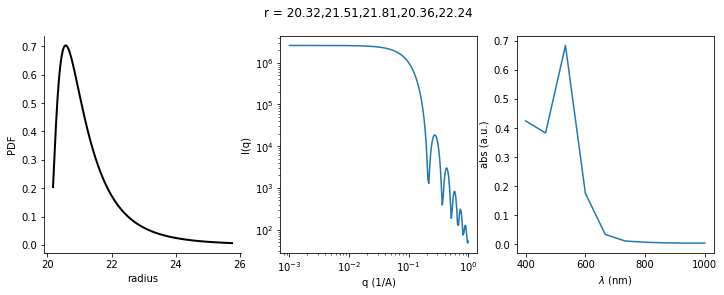

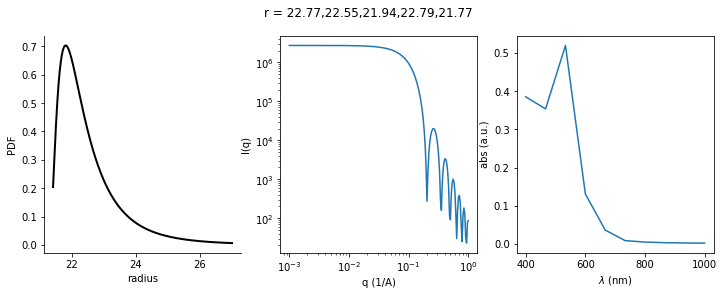

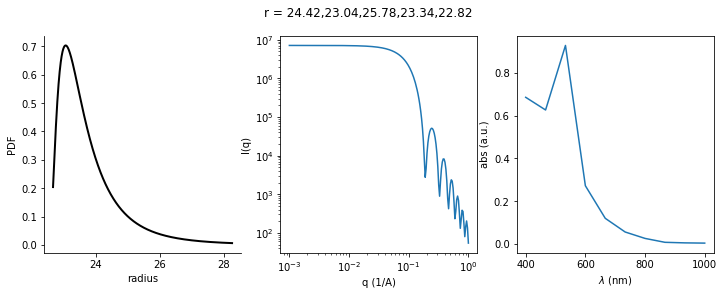

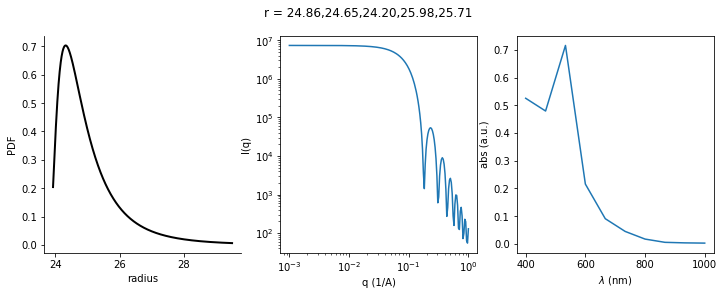

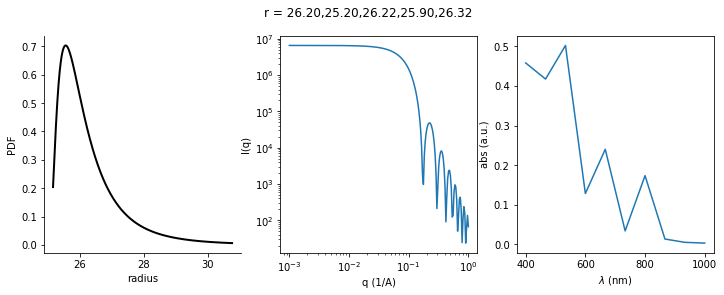

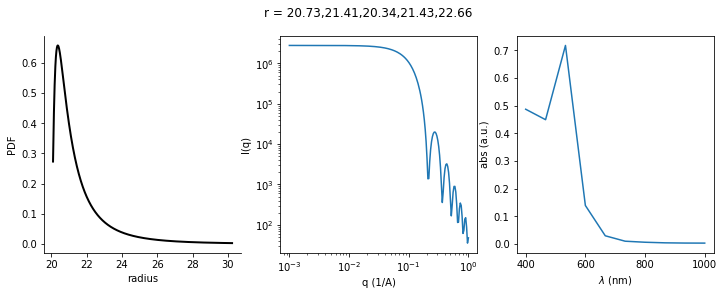

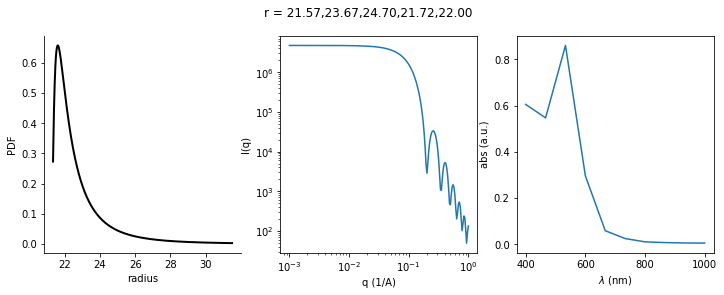

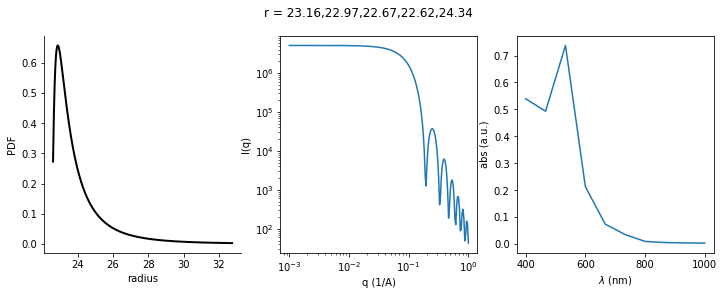

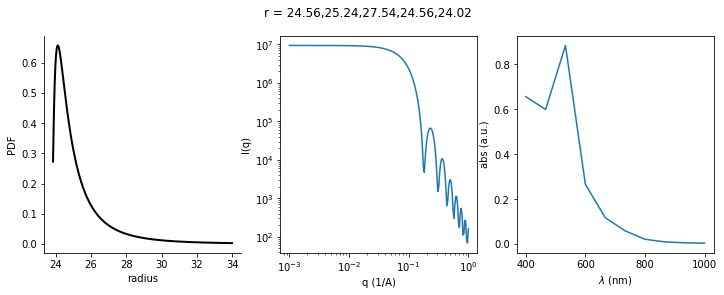

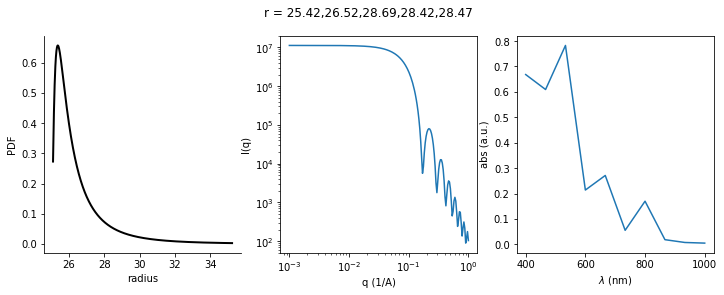

In [7]:
for i in grid:
    run(i[0],i[1])